<a href="https://colab.research.google.com/github/zghnjkt/kwonkt0317/blob/main/%EB%85%BC%ED%94%84_non_smaile_GAN_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
## 안웃는 얼굴 만들기
## Dataset은 아래 주소 Smiling or Not | Face Data 에서 퍼었음.
### https://www.kaggle.com/datasets/chazzer/smiling-or-not-face-data

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [74]:
pwd

'/content/drive/My Drive'

In [75]:
cd /content/drive/MyDrive/Data1

/content/drive/MyDrive/Data1


Text(0.5, 1.0, 'Non_Simle')

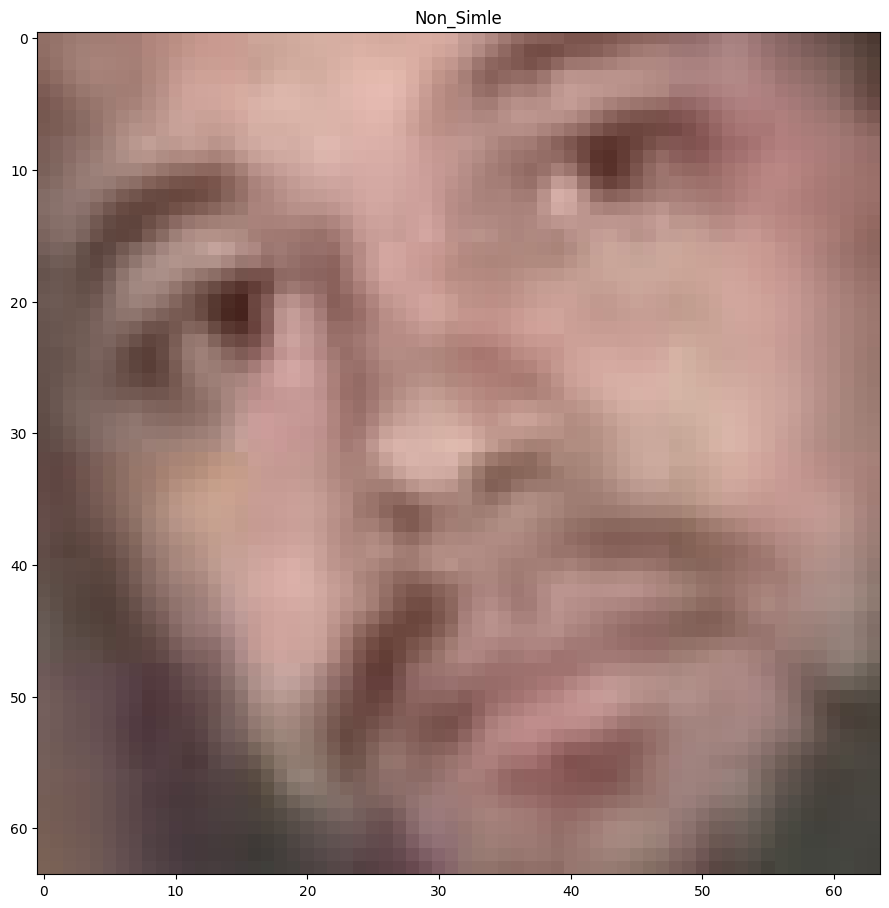

In [76]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('non_smile/Aaron_Patterson_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Non_Simle')

In [77]:
image_sample.shape

(64, 64, 3)

In [78]:
pwd

'/content/drive/MyDrive/Data1'

In [79]:
cd ..

/content/drive/MyDrive


In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
    rescale=1./255,  # 픽셀 값을 0~1 범위로 변환
    )

train = train_gen.flow_from_directory(
    directory='/content/drive/MyDrive/Data1',
    target_size=(64, 64),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
    color_mode='rgb',      # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
    class_mode='binary',
    batch_size=1,
    shuffle=True)

len(train[0][0])
train[0][0][0]

Found 603 images belonging to 1 classes.


array([[[0.6313726 , 0.37647063, 0.227451  ],
        [0.6509804 , 0.39607847, 0.24705884],
        [0.69411767, 0.427451  , 0.27450982],
        ...,
        [0.7372549 , 0.45098042, 0.2901961 ],
        [0.68235296, 0.3921569 , 0.24705884],
        [0.6431373 , 0.3529412 , 0.20784315]],

       [[0.6627451 , 0.40784317, 0.25882354],
        [0.6784314 , 0.42352945, 0.27450982],
        [0.7137255 , 0.44705886, 0.29411766],
        ...,
        [0.74509805, 0.454902  , 0.3019608 ],
        [0.68235296, 0.3921569 , 0.24705884],
        [0.6392157 , 0.34901962, 0.20392159]],

       [[0.7019608 , 0.44705886, 0.29803923],
        [0.70980394, 0.454902  , 0.30588236],
        [0.7372549 , 0.47058827, 0.31764707],
        ...,
        [0.7490196 , 0.4666667 , 0.30980393],
        [0.68235296, 0.40000004, 0.2509804 ],
        [0.6313726 , 0.34901962, 0.20000002]],

       ...,

       [[0.50980395, 0.26666668, 0.21568629],
        [0.5882353 , 0.34509805, 0.28627452],
        [0.6784314 , 0

In [81]:
train[0][0][0].shape

(64, 64, 3)

In [82]:
train[0][0].shape

(1, 64, 64, 3)

In [83]:
train[0][0]

array([[[[0.6313726 , 0.37647063, 0.227451  ],
         [0.6509804 , 0.39607847, 0.24705884],
         [0.69411767, 0.427451  , 0.27450982],
         ...,
         [0.7372549 , 0.45098042, 0.2901961 ],
         [0.68235296, 0.3921569 , 0.24705884],
         [0.6431373 , 0.3529412 , 0.20784315]],

        [[0.6627451 , 0.40784317, 0.25882354],
         [0.6784314 , 0.42352945, 0.27450982],
         [0.7137255 , 0.44705886, 0.29411766],
         ...,
         [0.74509805, 0.454902  , 0.3019608 ],
         [0.68235296, 0.3921569 , 0.24705884],
         [0.6392157 , 0.34901962, 0.20392159]],

        [[0.7019608 , 0.44705886, 0.29803923],
         [0.70980394, 0.454902  , 0.30588236],
         [0.7372549 , 0.47058827, 0.31764707],
         ...,
         [0.7490196 , 0.4666667 , 0.30980393],
         [0.68235296, 0.40000004, 0.2509804 ],
         [0.6313726 , 0.34901962, 0.20000002]],

        ...,

        [[0.50980395, 0.26666668, 0.21568629],
         [0.5882353 , 0.34509805, 0.28627452]

In [84]:
type(train[0][0])

numpy.ndarray

In [85]:
X_train = np.array(train[0][0])

for i in range(1, 603):
  X_train = np.append(X_train, train[i][0], axis = 0)

X_train.shape


(603, 64, 64, 3)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 7ms/step
6000 [D loss: 0.689488, acc.: 54.30%] [G loss: 1.090056]
4/4 [==============================] - 0s 5ms/step
7000 [D loss: 0.628188, acc.: 58.20%] [G loss: 1.087198]
4/4 [==============================] - 0s 5ms/step
8000 [D loss: 0.820273, acc.: 41.80%] [G loss: 0.907802]
4/4 [==============================] - 0s 6ms/step
9000 [D loss: 0.779922, acc.: 47.66%] [G loss: 1.019979]
4/4 [==============================] - 0s 5ms/step
10000 [D loss: 0.567845, acc.: 72.27%] [G loss: 1.254124]
1/1 [==============================] - 0s 16ms/step


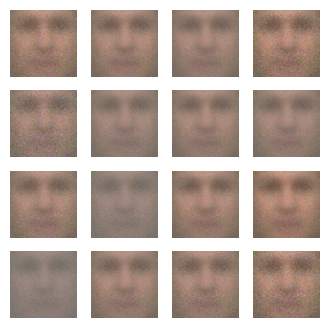

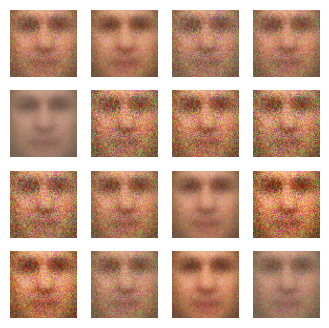

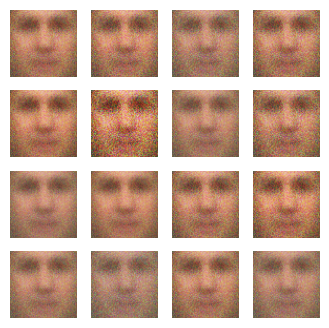

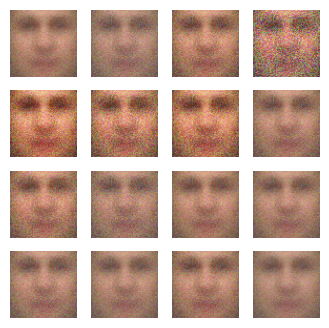

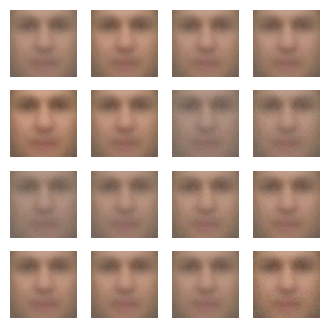

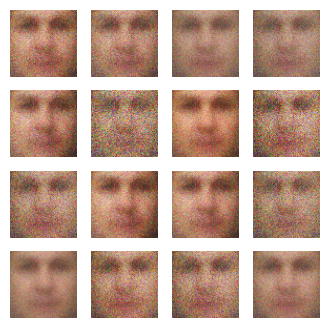

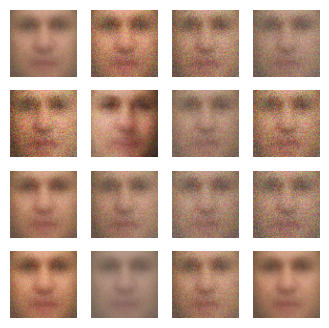

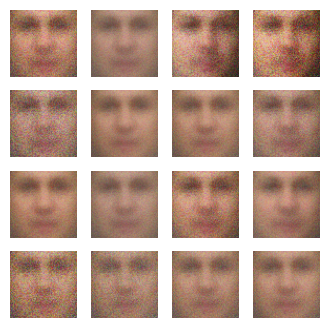

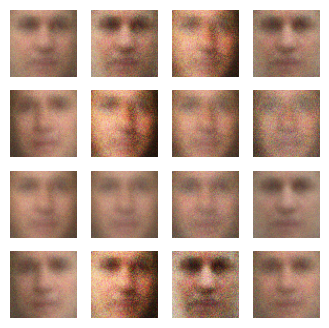

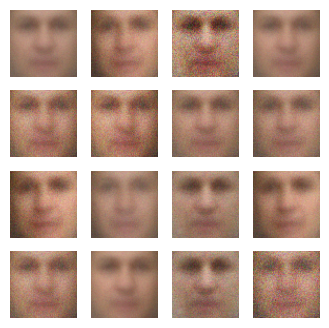

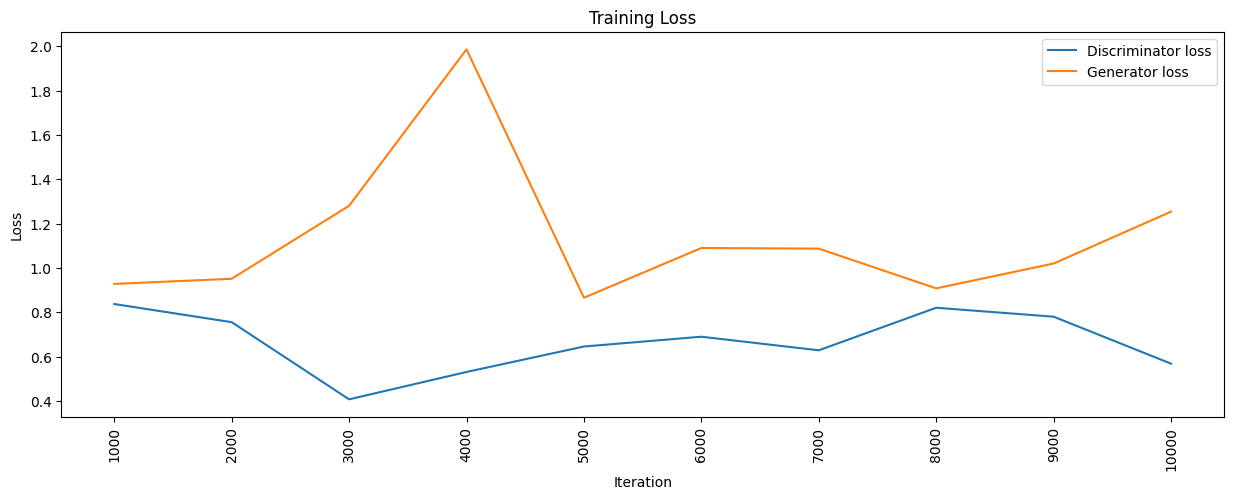

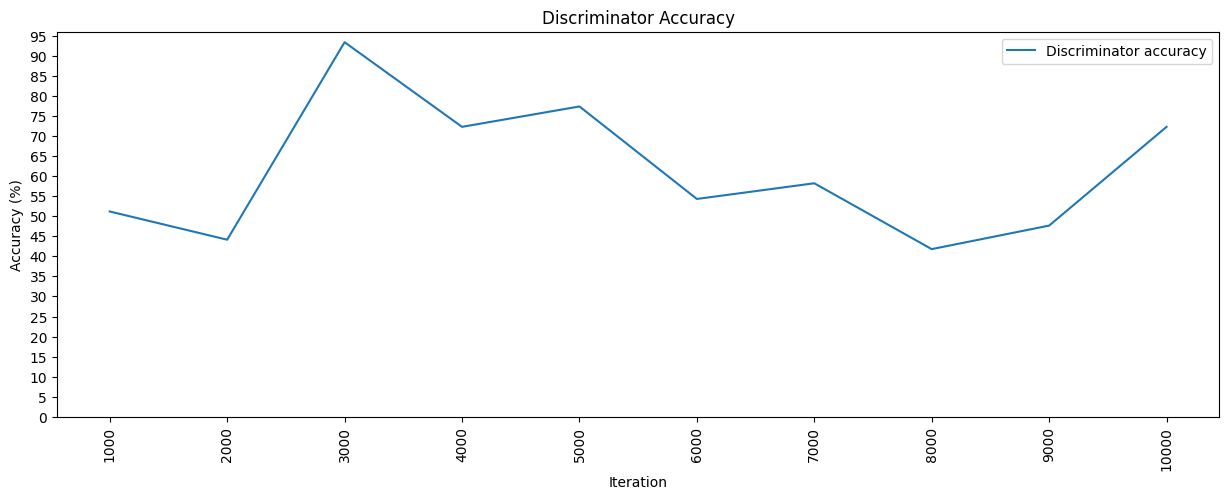

In [86]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam


img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100


def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(64 * 64 * 3, activation='sigmoid'))
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)

    return model


discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)


gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []




def train(iterations, batch_size, sample_interval, X_train2):

    X_train = X_train2
 ###   X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        discriminator.trainable = True

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        discriminator.trainable = False

        z = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)



def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)
    ###gen_imgs = 0.5*gen_imgs

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :] )#, cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 10000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval, X_train)

losses = np.array(losses)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()
